In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')

In [22]:
df = pd.read_csv('Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [24]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [25]:
for i in df:
    if df[i].isnull().sum()>0:
        print(f'{i} has: {df[i].isnull().sum()} missing values')

Weather has: 30 missing values
Traffic_Level has: 30 missing values
Time_of_Day has: 30 missing values
Courier_Experience_yrs has: 30 missing values


In [26]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Traffic_Level'] = df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

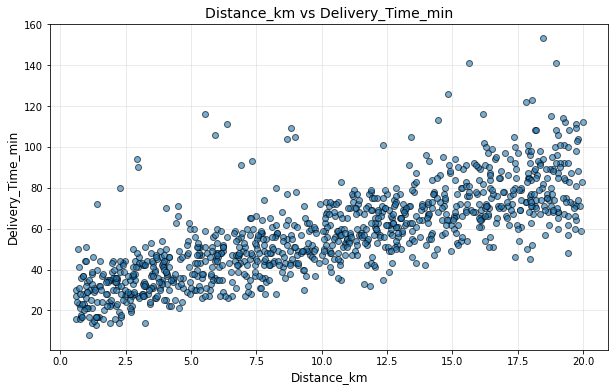

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Distance_km"], df["Delivery_Time_min"], alpha=0.6, edgecolor='k')
plt.title("Distance_km vs Delivery_Time_min", fontsize=14)
plt.xlabel("Distance_km", fontsize=12)
plt.ylabel("Delivery_Time_min", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

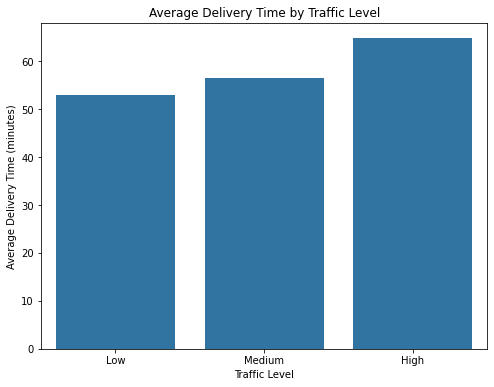

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Traffic_Level', y='Delivery_Time_min', data=df, errorbar=None)
plt.title("Average Delivery Time by Traffic Level")
plt.xlabel("Traffic Level")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

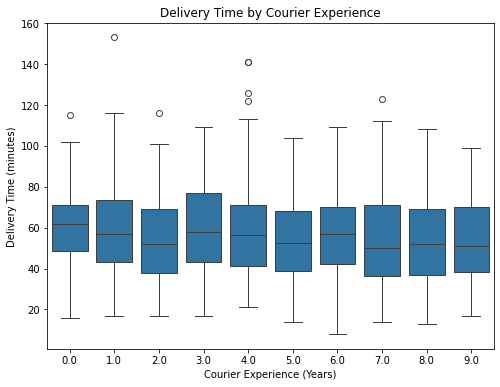

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df)
plt.title("Delivery Time by Courier Experience")
plt.xlabel("Courier Experience (Years)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

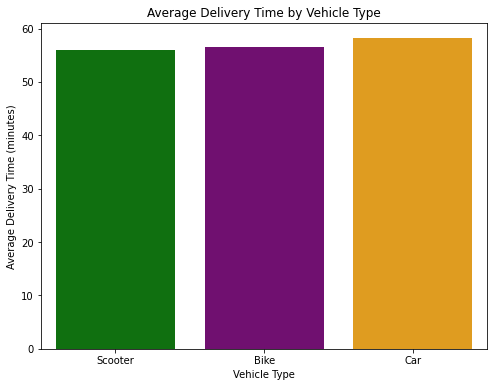

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Vehicle_Type', y='Delivery_Time_min', data=df, errorbar=None, hue='Vehicle_Type', palette = {'Scooter': "green", 'Bike': "purple", 'Car': 'orange'})
plt.title("Average Delivery Time by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

In [31]:
df = pd.get_dummies(df, columns=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], drop_first=True)

In [32]:
df.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,741,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,661,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,412,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False


In [33]:
X = df.drop(['Order_ID', 'Delivery_Time_min'], axis = 1)
y = df['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 14)
(800,)
(200, 14)
(200,)


In [35]:
model = XGBRegressor(objective='reg:squarederror', eval_metric='mae', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2, 0.5],
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_
print(f"Test Accuracy: {best_xgb.score(X_test, y_test):.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy: 0.7868


In [36]:
y_pred1 = best_xgb.predict(X_test)
mean_absolute_error(y_test, y_pred1)

print('Score on train data =', round(best_xgb.score(X_train, y_train), 4))
print('Score on test data =', round(best_xgb.score(X_test, y_test), 4))
print('MAE on test data =', round(mean_absolute_error(y_test, y_pred1), 4))

Score on train data = 0.7995
Score on test data = 0.7868
MAE on test data = 6.6948


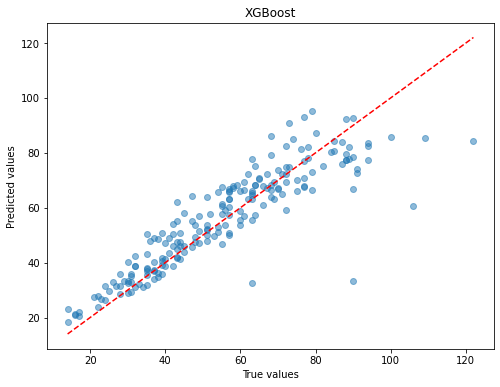

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred1, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('XGBoost')
plt.show()

In [42]:
model2 = RandomForestRegressor(random_state=42)

param_grid2 = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3,6,9],
    'max_features': [0.1, 0.2, 0.5, 1],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model2, param_grid=param_grid2, cv=5, n_jobs=-1, verbose=2)
 
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
print(f"Test Accuracy: {best_rf.score(X_test, y_test):.4f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'max_depth': 9, 'max_features': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Test Accuracy: 0.7788


In [43]:
y_pred2 = best_rf.predict(X_test)
mean_absolute_error(y_test, y_pred2)

print('Score on train data =', round(best_rf.score(X_train, y_train), 4))
print('Score on test data =', round(best_rf.score(X_test, y_test), 4))
print('MAE on test data =', round(mean_absolute_error(y_test, y_pred2), 4))

Score on train data = 0.8384
Score on test data = 0.7788
MAE on test data = 6.8913


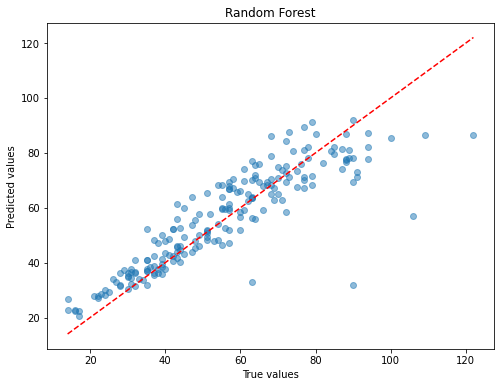

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.show()